About Dataset
The Cars dataset contains 211 of24 features of cars. where features has been split roughly in a 50-50 split. features are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Reading the data

In [3]:
df=pd.read_csv("/kaggle/input/car-price-dataset/car_price.csv")

In [4]:
df.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
205,bmw x3,sedan,rwd,front,gas,std,four,six,ohc,mpfi,...,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.0
206,mitsubishi g4,hatchback,fwd,front,gas,std,two,four,ohc,2bbl,...,2328,122,3.35,3.46,8.5,88,5000,25,32,8499.0
207,peugeot 304,sedan,rwd,front,diesel,turbo,four,four,l,idi,...,3197,152,3.70,3.52,21.0,95,4150,28,33,13200.0
208,peugeot 504 (sw),wagon,rwd,front,gas,std,four,four,l,mpfi,...,3230,120,3.46,3.19,8.4,97,5000,19,24,12440.0
209,peugeot 504,wagon,rwd,front,diesel,turbo,four,four,l,idi,...,3430,152,3.70,3.52,21.0,95,4150,25,25,13860.0


In [6]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.828571,98.947143,174.354286,65.935714,53.768571,2565.909524,127.266667,3.333905,3.258286,10.224381,104.000000,5110.476190,25.180952,30.695238,13289.665081
std,1.244757,6.172319,12.457557,2.141794,2.489242,522.279331,41.297095,0.270150,0.311277,4.068746,39.114725,484.530811,6.487059,6.835908,7918.471818
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.320000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10470.000000
75%,2.000000,102.400000,183.500000,66.900000,55.575000,2953.500000,145.750000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           210 non-null    object 
 1   carbody           210 non-null    object 
 2   drivewheel        210 non-null    object 
 3   enginelocation    210 non-null    object 
 4   fueltype          210 non-null    object 
 5   aspiration        210 non-null    object 
 6   doornumber        210 non-null    object 
 7   cylindernumber    210 non-null    object 
 8   enginetype        210 non-null    object 
 9   fuelsystem        210 non-null    object 
 10  symboling         210 non-null    int64  
 11  wheelbase         210 non-null    float64
 12  carlength         210 non-null    float64
 13  carwidth          210 non-null    float64
 14  carheight         210 non-null    float64
 15  curbweight        210 non-null    int64  
 16  enginesize        210 non-null    int64  
 1

In [8]:
df.isnull().sum().sum()

0

#REMOVE COLOUMNS

In [10]:
df=df.drop(['CarName','carbody','fueltype','enginetype','fuelsystem','drivewheel',
            'enginelocation','aspiration','doornumber','cylindernumber'],axis=1)

In [12]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


#VISUALIZATION

#EDA(UNIVARIANT ANALYSIS) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a8d9b7f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a8db42850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a8db33f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a8db42f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a8db55290>],
 'means': []}

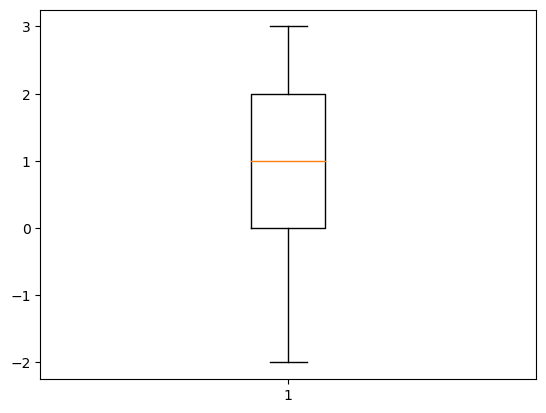

In [13]:
plt.boxplot(df['symboling'])

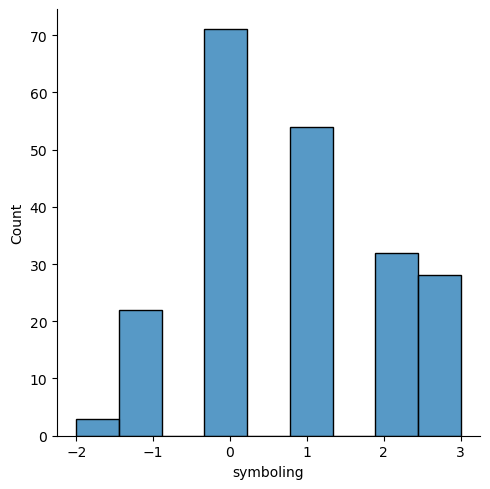

In [14]:
sns.displot(df['symboling'])

<AxesSubplot:xlabel='wheelbase', ylabel='Count'>

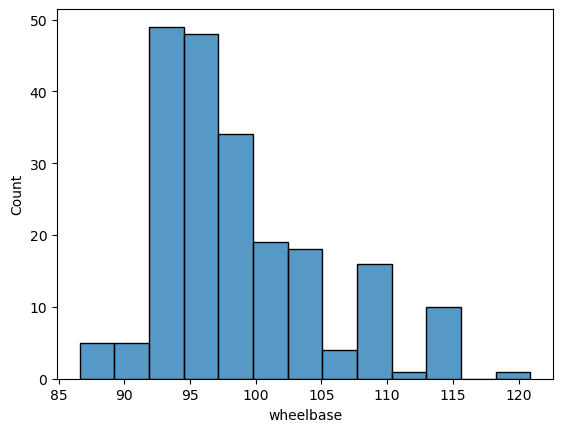

In [153]:
sns.histplot(df["wheelbase"])

<AxesSubplot:xlabel='carwidth', ylabel='Count'>

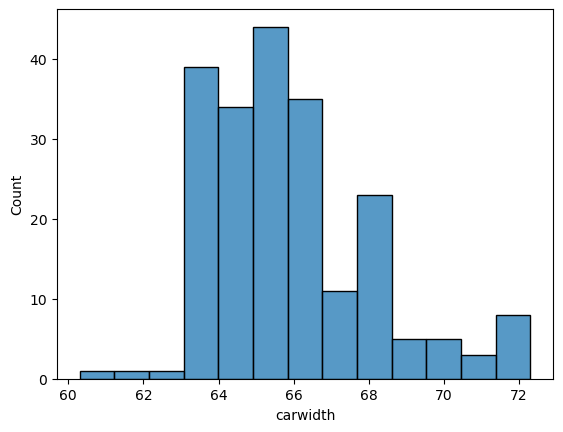

In [15]:

sns.histplot(df["carwidth"])

<AxesSubplot:xlabel='price', ylabel='Count'>

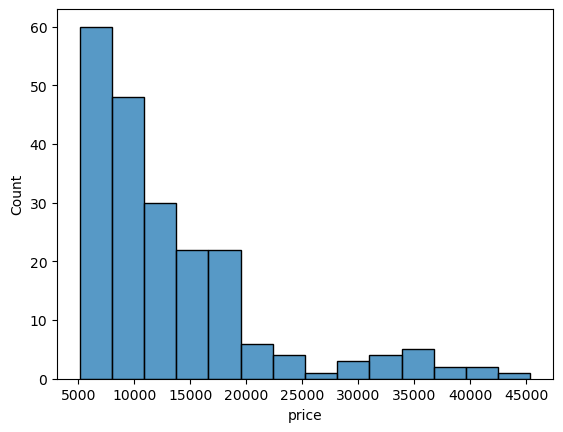

In [17]:
sns.histplot(x='price',data=df)

#BIVARIANT PLOT

<AxesSubplot:xlabel='enginesize', ylabel='horsepower'>

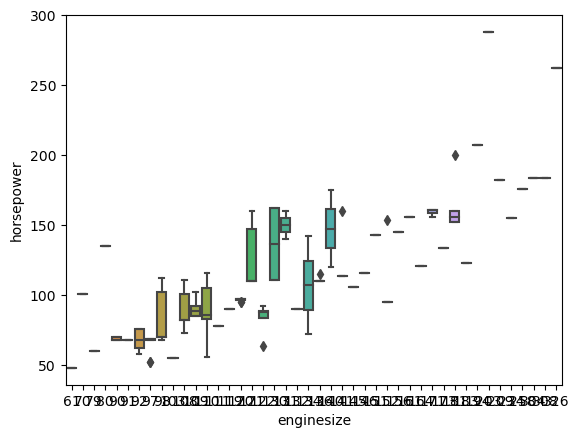

In [72]:
sns.boxplot(x="enginesize",y="horsepower",data=df)

#USING ENCODING OR DELETE ALL STRING OBJ

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         210 non-null    int64  
 1   wheelbase         210 non-null    float64
 2   carlength         210 non-null    float64
 3   carwidth          210 non-null    float64
 4   carheight         210 non-null    float64
 5   curbweight        210 non-null    int64  
 6   enginesize        210 non-null    int64  
 7   boreratio         210 non-null    float64
 8   stroke            210 non-null    float64
 9   compressionratio  210 non-null    float64
 10  horsepower        210 non-null    int64  
 11  peakrpm           210 non-null    int64  
 12  citympg           210 non-null    int64  
 13  highwaympg        210 non-null    int64  
 14  price             210 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.7 KB


<AxesSubplot:>

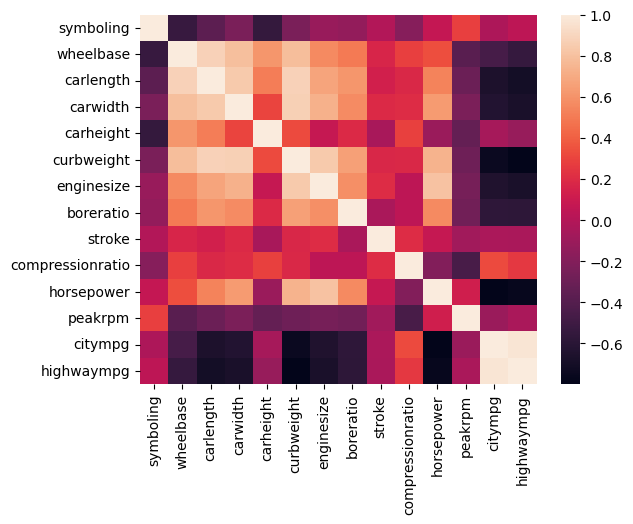

In [73]:
corr = df1.select_dtypes("number").drop(columns = ["price"]).corr()
sns.heatmap(corr)

In [22]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [24]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

In [28]:

df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df = df.drop(['wheelbase',"carlength",'carwidth','carheight','boreratio','stroke'],axis = 1)

In [30]:
df.head()

,symboling,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2548,130,9.0,111,5000,21,27,13495.0
1,3,2548,130,9.0,111,5000,21,27,16500.0
2,1,2823,152,9.0,154,5000,19,26,16500.0
3,2,2337,109,10.0,102,5500,24,30,13950.0
4,2,2824,136,8.0,115,5500,18,22,17450.0


In [32]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [34]:
X = df.drop(['price'],axis=1)

In [35]:
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,symboling,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg
150,1,1985,92,9.0,62,4800,35,39
96,1,1971,97,9.4,69,5200,31,37
200,-1,2952,141,9.5,114,5400,23,28
68,-1,3750,183,21.5,123,4350,22,25
156,0,2081,98,9.0,70,4800,30,37


In [38]:
y_train

150     5348.0
96      7499.0
200    16845.0
68     28248.0
156     6938.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 168, dtype: float64

In [39]:
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
reg.coef_

array([ -46.23966775,    2.8918394 ,  105.7821232 ,  284.28033092,
         22.51140148,    2.03285007, -294.71989191,  106.21870286])

In [41]:
reg.intercept_

-19076.59938567329

In [42]:
y_pred=reg.predict(X_test)

In [44]:
y_pred

array([  603.56553659, 16004.42712293, 18116.15169431, 17323.91143808,
       10627.88278572,  8802.44807519,  4614.64108509,  9078.38124727,
       18003.3995468 , 16563.90750007, 16207.63445701,  8571.56052418,
       18045.35198146, 26275.89094474, 27342.50688615, 37920.0547873 ,
       11821.77296767, -2486.81009342, 14734.90962792,  6581.22735535,
       17429.47000348,  9647.78706645, 10617.53319694, 14643.27863131,
       18045.35198146,  7425.19678066,  6433.10043572, 19160.00801433,
       27776.28279561,  8748.29487858, 10169.92285891, 24283.9650896 ,
       22897.85749929, 24388.04154527, 22599.04188711, 13851.20048137,
       21465.5615554 ,  6592.79471294, 17847.21063045,  9736.06316706,
       16827.09464774,  6729.86532553])

In [47]:
accuracy = reg.score(X_test,y_test)

In [49]:
print(accuracy)

0.7774716489900242


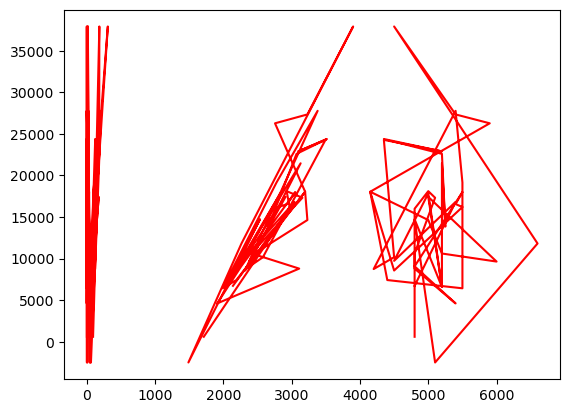

In [50]:
plt.plot(X_test, y_pred, color = 'red')
plt.show()

#FINDING ERRORS

In [51]:
from sklearn.metrics import mean_absolute_error

In [53]:
mean_absolute_error(y_test, y_pred)

3027.1745847719403

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

16765706.457359774

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7774716489900242

# Ridge Regression

In [58]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.1)
reg.fit(X_train,y_train)

print(reg.coef_)

print(reg.intercept_)

[ -46.17565064    2.89229218  105.77808487  284.22640997   22.51567584
    2.03278297 -294.56246694  106.11135242]
-19077.514875400397


In [59]:
accuracy = reg.score(X_test,y_test)
print(accuracy)

0.7774763602250234


In [61]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

print(reg.coef_)

print(reg.intercept_)

[ -46.12281593    2.89224319  105.77893603  284.24212235   22.5138254
    2.03279174 -294.59128927  106.12680249]
-19077.303265640418


In [62]:
accuracy = reg.score(X_test,y_test)
print(accuracy)

0.7774742943954704


***plz upvote if it's helpfull***